In [19]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#read data.npy
data = np.load('data.npy')
x = data[0]
y = data[1]

In [21]:
print(data.shape)

(2, 100, 1)


In [23]:
print(x[0][0])

0.042828681417311144


In [24]:
print(x.shape)

(100, 1)


In [25]:
print(y.shape)

(100, 1)


In [26]:
# Sigmoid aktivasyon fonksiyonunu tanımlayalım
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Sigmoid'in türevini tanımlayalım
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Perceptron modelini eğitmek için gradyan inişiyle eğitim fonksiyonunu yazalım
def train_perceptron(x, y, lr=0.01, epochs=1000):
    # Veri boyutlarını alalım
    n_samples, n_features = x.shape
    
    # Ağırlık ve bias başlangıç değerlerini tanımlayalım
    weights = np.zeros((n_features, 1))
    bias = 0

    # Eğitim döngüsü
    for _ in range(epochs):
        # Doğrusal kombinasyon
        linear_output = np.dot(x, weights) + bias
        
        # Sigmoid aktivasyon fonksiyonu
        y_pred = sigmoid(linear_output)
        
        # Hata
        error = y_pred - y

        # Gradyanların hesaplanması
        d_weights = np.dot(x.T, error) / n_samples
        d_bias = np.sum(error) / n_samples

        # Ağırlık ve bias güncellemesi
        weights -= lr * d_weights
        bias -= lr * d_bias

    return weights, bias

# Perceptron modelini eğitelim
weights, bias = train_perceptron(x, y)

weights, bias


(array([[-0.03035299]]), np.float64(-1.4045613120803286))

In [27]:
# Tahmin fonksiyonunu tanımlayalım
def predict(x, weights, bias):
    linear_output = np.dot(x, weights) + bias
    y_pred = sigmoid(linear_output)
    return y_pred

# Modelin tahminlerini alalım
y_pred = predict(x, weights, bias)

# İlk 10 gerçek değer ve tahmin sonuçlarını karşılaştıralım
np.hstack((y[:10], y_pred[:10]))


array([[0.18565736, 0.19688766],
       [0.10170164, 0.19708921],
       [0.11798011, 0.19705012],
       [0.1629398 , 0.19694218],
       [0.10764505, 0.19707494],
       [0.12574556, 0.19703147],
       [0.1945486 , 0.19686632],
       [0.18078093, 0.19689936],
       [0.12738934, 0.19702753],
       [0.19751492, 0.19685921]])

In [28]:
# Ortalama kare hata (MSE) metrik fonksiyonunu tanımlayalım
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Modelin performansını değerlendirelim
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)


MSE: 0.0031227231425158806


In [ ]:
import numpy as np

# Sigmoid ve türevi
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Çoklu perceptron modeli için eğitim fonksiyonu
def train_multi_perceptron(x, y, perceptron_num, lr=0.001, epochs=10000):
    n_samples, n_features = x.shape

    # Ağırlık ve bias değerlerini çoklu perceptron için başlat
    weights = np.zeros((n_features, perceptron_num))
    biases = np.zeros(perceptron_num)

    # Eğitim döngüsü
    for _ in range(epochs):
        # Doğrusal kombinasyon
        linear_output = np.dot(x, weights) + biases
        
        # Sigmoid aktivasyon fonksiyonu
        y_pred = sigmoid(linear_output)
        
        # Hata
        error = y_pred - y.reshape(-1, 1)

        # Gradyanlar
        d_weights = np.dot(x.T, error) / n_samples
        d_biases = np.sum(error, axis=0) / n_samples

        # Güncellemeler
        weights -= lr * d_weights
        biases -= lr * d_biases

    return weights, biases

# Örnek kullanım
perceptron_num = 1 # Örneğin 3 perceptron
weights_multi, biases_multi = train_multi_perceptron(x, y, perceptron_num)

print("Ağırlıklar:", weights_multi)
print("Biaslar:", biases_multi)


Ağırlıklar: [[-0.03034244 -0.03034244 -0.03034244 -0.03034244 -0.03034244 -0.03034244
  -0.03034244 -0.03034244 -0.03034244 -0.03034244]]
Biaslar: [-1.40413198 -1.40413198 -1.40413198 -1.40413198 -1.40413198 -1.40413198
 -1.40413198 -1.40413198 -1.40413198 -1.40413198]


In [44]:
# Tahmin fonksiyonunu tanımlayalım
def predict(x, weights, bias):
    linear_output = np.dot(x, weights) + bias
    y_pred = sigmoid(linear_output)
    return y_pred

# Modelin tahminlerini alalım
y_pred = predict(x, weights_multi, biases_multi)

# İlk 10 gerçek değer ve tahmin sonuçlarını karşılaştıralım
np.hstack((y[:10], y_pred[:10]))


array([[0.8782174 , 0.1929773 , 0.1929773 , 0.1929773 , 0.1929773 ,
        0.1929773 , 0.1929773 , 0.1929773 , 0.1929773 , 0.1929773 ,
        0.1929773 ],
       [0.01595329, 0.19708464, 0.19708464, 0.19708464, 0.19708464,
        0.19708464, 0.19708464, 0.19708464, 0.19708464, 0.19708464,
        0.19708464],
       [0.18314073, 0.19628313, 0.19628313, 0.19628313, 0.19628313,
        0.19628313, 0.19628313, 0.19628313, 0.19628313, 0.19628313,
        0.19628313],
       [0.64489754, 0.19408224, 0.19408224, 0.19408224, 0.19408224,
        0.19408224, 0.19408224, 0.19408224, 0.19408224, 0.19408224,
        0.19408224],
       [0.0769949 , 0.19679171, 0.19679171, 0.19679171, 0.19679171,
        0.19679171, 0.19679171, 0.19679171, 0.19679171, 0.19679171,
        0.19679171],
       [0.2628955 , 0.19590165, 0.19590165, 0.19590165, 0.19590165,
        0.19590165, 0.19590165, 0.19590165, 0.19590165, 0.19590165,
        0.19590165],
       [0.96953454, 0.19254615, 0.19254615, 0.19254615, 0.

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Normalize input features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Normalize target
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

# Define the Multi-Perceptron Model
class MultiPerceptron(nn.Module):
    def __init__(self, input_dim, perceptron_num):
        super(MultiPerceptron, self).__init__()
        self.linear = nn.Linear(input_dim, perceptron_num)  # Single layer perceptron
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation

# Model parameters
input_dim = x.shape[1]  # Number of features
perceptron_num = 1  # Number of perceptrons
model = MultiPerceptron(input_dim, perceptron_num)

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic gradient descent

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_tensor)
    
    # Compute loss
    loss = criterion(predictions, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Final weights and biases
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Test the model
with torch.no_grad():
    test_predictions = model(x_tensor)
    print("Predictions (first 5 samples):", test_predictions[:5].numpy())


Epoch 500/5000, Loss: 0.07676882296800613
Epoch 1000/5000, Loss: 0.07011928409337997
Epoch 1500/5000, Loss: 0.0643724799156189
Epoch 2000/5000, Loss: 0.05920984223484993
Epoch 2500/5000, Loss: 0.05453474819660187
Epoch 3000/5000, Loss: 0.05029630288481712
Epoch 3500/5000, Loss: 0.04645355045795441
Epoch 4000/5000, Loss: 0.04296908527612686
Epoch 4500/5000, Loss: 0.039808109402656555
Epoch 5000/5000, Loss: 0.036938510835170746
linear.weight: tensor([[1.4597]])
linear.bias: tensor([-0.6369])
Predictions (first 5 samples): [[0.655906  ]
 [0.3512447 ]
 [0.40865615]
 [0.5755466 ]
 [0.37180802]]


In [48]:
# Testing the model with test data
def test_model(model, x_test, y_test):
    # Ensure model is in evaluation mode
    model.eval()
    
    # Convert test data to tensors
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
    
    # Make predictions
    with torch.no_grad():
        predictions = model(x_test_tensor)
    
    # Calculate Mean Squared Error (MSE) as a test metric
    mse_loss = nn.MSELoss()
    test_loss = mse_loss(predictions, y_test_tensor)
    
    print(f"Test MSE Loss: {test_loss.item()}")
    
    # Print some sample predictions and ground truth
    print("Sample Predictions:", predictions[:5].numpy().flatten())
    print("Ground Truth:", y_test[:5].flatten())

# Split the original data into train and test sets
from sklearn.model_selection import train_test_split

# Split 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Retrain the model on the training data
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Update the training loop to work with train split
model = MultiPerceptron(input_dim, perceptron_num)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(epochs):
    predictions = model(x_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Test the model with the test dataset
test_model(model, x_test, y_test)


Test MSE Loss: 0.05786614492535591
Sample Predictions: [0.4812433  0.57728374 0.5487163  0.49753788 0.55695367]
Ground Truth: [0.22663843 0.69246365 0.55254882 0.3051968  0.59269006]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Normalize input features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Normalize target
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

# Define the Multi-Layer Perceptron (MLP)
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim):
        super(MultiLayerPerceptron, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, 64)  # Input layer to hidden layer 1 (64 neurons)
        self.fc2 = nn.Linear(64, 32)        # Hidden layer 1 to hidden layer 2 (32 neurons)
        self.fc3 = nn.Linear(32, 1)         # Hidden layer 2 to output layer (1 neuron)
        self.activation = nn.Sigmoid()      # Sigmoid activation for regression output
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))         # Apply ReLU activation for hidden layers
        x = torch.relu(self.fc2(x))
        x = self.activation(self.fc(x))   # Apply Sigmoid for output layer
        return x

# Model parameters
input_dim = x.shape[1]  # Number of features
model = MultiLayerPerceptron(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer for better learning

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_tensor)
    
    # Compute loss
    loss = criterion(predictions, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Final weights and biases
print("\nFinal Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Test the model
with torch.no_grad():
    test_predictions = model(x_tensor)
    print("\nPredictions (first 5 samples):", test_predictions[:5].numpy())


Epoch 500/5000, Loss: 0.000773691339418292
Epoch 1000/5000, Loss: 0.0005457349470816553
Epoch 1500/5000, Loss: 0.0003245986008550972
Epoch 2000/5000, Loss: 0.00017663683684077114
Epoch 2500/5000, Loss: 0.00011653382534859702
Epoch 3000/5000, Loss: 8.47363262437284e-05
Epoch 3500/5000, Loss: 6.328737072180957e-05
Epoch 4000/5000, Loss: 5.122520451550372e-05
Epoch 4500/5000, Loss: 4.353125405032188e-05
Epoch 5000/5000, Loss: 3.7222715036477894e-05

Final Model Parameters:
fc1.weight: tensor([[ 0.2605],
        [-0.6033],
        [ 0.8694],
        [-0.2935],
        [ 1.3301],
        [-0.6397],
        [-2.2439],
        [ 1.1786],
        [ 0.2198],
        [-0.2006],
        [-0.5359],
        [ 0.8200],
        [-0.5239],
        [-0.5549],
        [ 0.4437],
        [-0.5343],
        [-0.6193],
        [-0.5094],
        [ 0.5811],
        [ 0.0267],
        [ 0.7761],
        [ 0.2753],
        [ 0.9710],
        [ 0.1635],
        [ 0.9827],
        [-0.9277],
        [ 0.8769],


Model Performance on Training Data:
Mean Squared Error (MSE): 0.0000
R-squared (R²): 0.9996


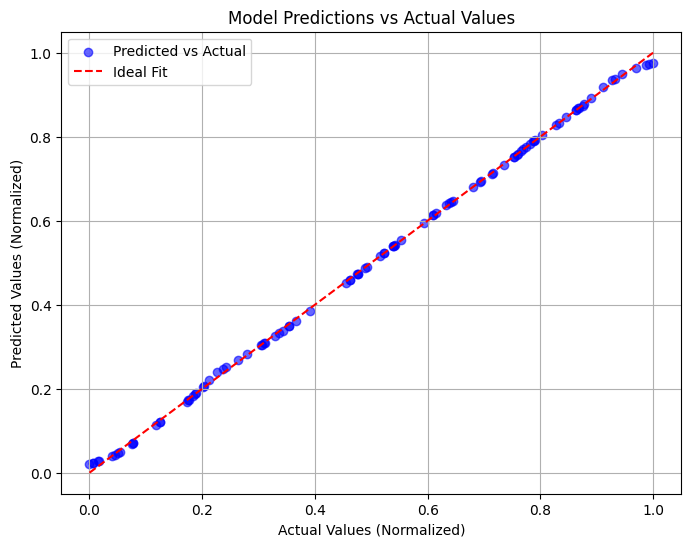

Prediction for first sample: 0.8769
Actual value for first sample: 0.8782


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on the training data
with torch.no_grad():
    y_pred = model(x_tensor)  # Predictions on the training data
    y_pred_np = y_pred.numpy()  # Convert predictions to NumPy
    y_true_np = y_tensor.numpy()  # Convert actual values to NumPy

# Calculate performance metrics
mse = mean_squared_error(y_true_np, y_pred_np)  # Mean Squared Error
r2 = r2_score(y_true_np, y_pred_np)            # R-squared score

# Print performance metrics
print("Model Performance on Training Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_true_np, y_pred_np, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Ideal Fit")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Example: Testing on a single sample
single_sample = x_tensor[0].unsqueeze(0)  # Select the first sample and add batch dimension
with torch.no_grad():
    single_prediction = model(single_sample)
print(f"Prediction for first sample: {single_prediction.item():.4f}")
print(f"Actual value for first sample: {y_tensor[0].item():.4f}")


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Normalize input features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Normalize target
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

# Define the Multi-Layer Perceptron (MLP)
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim):
        super(MultiLayerPerceptron, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, 64)  # Input layer to hidden layer 1 (64 neurons)
        self.fc2 = nn.Linear(64, 1)        # Hidden layer 1 to hidden layer 2 (32 neurons)
        self.activation = nn.Sigmoid()      # Sigmoid activation for regression output
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))         # Apply ReLU activation for hidden layers
        x = self.activation(self.fc2(x))   # Apply Sigmoid for output layer
        return x

# Model parameters
input_dim = x.shape[1]  # Number of features
model = MultiLayerPerceptron(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer for better learning

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_tensor)
    
    # Compute loss
    loss = criterion(predictions, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Final weights and biases
print("\nFinal Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Test the model
with torch.no_grad():
    test_predictions = model(x_tensor)
    print("\nPredictions (first 5 samples):", test_predictions[:5].numpy())


Epoch 500/5000, Loss: 0.0011255599092692137
Epoch 1000/5000, Loss: 0.0009439971763640642
Epoch 1500/5000, Loss: 0.0007877552416175604
Epoch 2000/5000, Loss: 0.0005730586708523333
Epoch 2500/5000, Loss: 0.00037801533471792936
Epoch 3000/5000, Loss: 0.00023692216200288385
Epoch 3500/5000, Loss: 0.00016338209388777614
Epoch 4000/5000, Loss: 0.00012580722977872938
Epoch 4500/5000, Loss: 0.00010211103654000908
Epoch 5000/5000, Loss: 8.536479435861111e-05

Final Model Parameters:
fc1.weight: tensor([[ 0.3876],
        [-0.4723],
        [-0.5038],
        [-0.6142],
        [-0.6128],
        [-3.0292],
        [ 0.4717],
        [ 0.4577],
        [-0.6140],
        [ 0.3460],
        [ 0.6103],
        [-0.9927],
        [ 0.5063],
        [-0.2791],
        [ 0.5050],
        [-0.7630],
        [ 0.0402],
        [-0.4337],
        [-0.3148],
        [-0.4273],
        [-0.5539],
        [-0.5210],
        [-0.4073],
        [-0.8057],
        [-0.3651],
        [ 0.0079],
        [ 0.142

Model Performance on Training Data:
Mean Squared Error (MSE): 0.0001
R-squared (R²): 0.9990


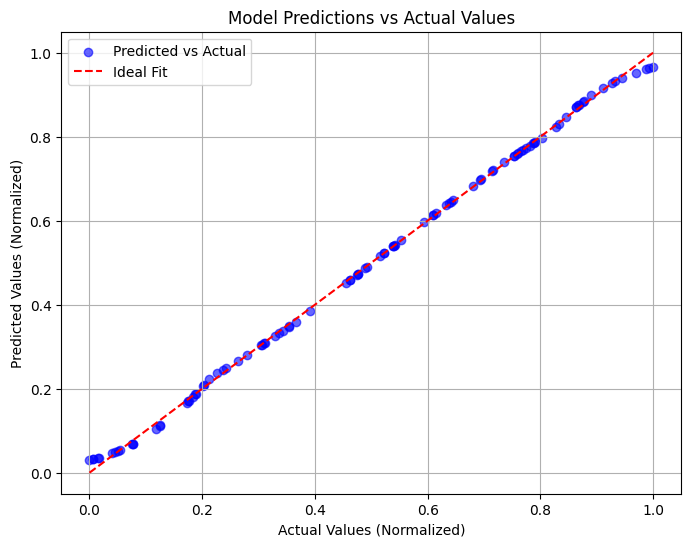

Prediction for first sample: 0.8862
Actual value for first sample: 0.8782


In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on the training data
with torch.no_grad():
    y_pred = model(x_tensor)  # Predictions on the training data
    y_pred_np = y_pred.numpy()  # Convert predictions to NumPy
    y_true_np = y_tensor.numpy()  # Convert actual values to NumPy

# Calculate performance metrics
mse = mean_squared_error(y_true_np, y_pred_np)  # Mean Squared Error
r2 = r2_score(y_true_np, y_pred_np)            # R-squared score

# Print performance metrics
print("Model Performance on Training Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_true_np, y_pred_np, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Ideal Fit")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Example: Testing on a single sample
single_sample = x_tensor[0].unsqueeze(0)  # Select the first sample and add batch dimension
with torch.no_grad():
    single_prediction = model(single_sample)
print(f"Prediction for first sample: {single_prediction.item():.4f}")
print(f"Actual value for first sample: {y_tensor[0].item():.4f}")
